<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Potencias </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv('numericos.csv')
df.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


In [2]:
df.skew()

0    6.000314
1   -2.772736
2   -1.012379
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

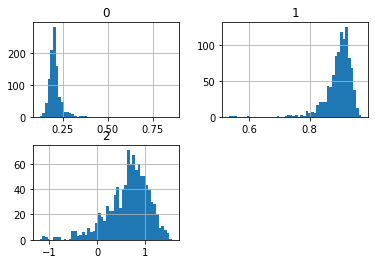

In [3]:
df.hist(bins=50)

In [4]:
# Compensando la variable '0'
df_copia=df.copy()
x=df['0']-df['0'].min()+1 # Variable desplazada a 1

In [8]:
a=-11
df_copia['0']=x**a
df_copia['0'].skew()

0.04181647238238833

In [9]:
# Compensando la variable '1'
x=df['1']-df['1'].min()+1

In [12]:
a=17
df_copia['1']=x**a
df_copia['1'].skew()

-0.027448039332947635

In [13]:
# Compensando la variable '2'
x=df['2']-df['2'].min()+1

In [18]:
a=3
df_copia['2']=x**a
df_copia['2'].skew()

0.03113961761990119

Aplicando una transformación de la forma
$$
x'=x^a,
$$
donde $x\in[1,\infty)$, obtuvimos los siguientes exponentes para cada variable

Variable|Sesgo original|$a$
--|--|--
'0'|6.0|-11
'1'|-2.77|17
'2'|-1.01|3

---

# Familia de transformaciones de potencia
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
haciendo $\displaystyle\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}$ se tiene
$$
x'=\ln(x).
$$

In [19]:
LMB=[-1,0.5,0,2,3,4]
x=np.linspace(0.1,10,100)
x

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [20]:
def potencia(x,lmb):
    if lmb==0:
        return np.log(x)
    else:
        return (x**lmb-1)/lmb

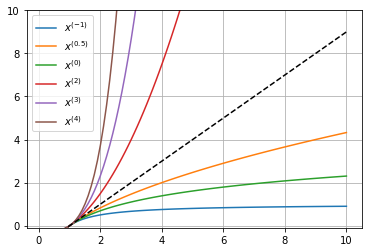

In [21]:
for lmb in LMB:
    xp=potencia(x,lmb)
    plt.plot(x,xp,label='$x^{('+str(lmb)+')}$')
plt.plot(x,x-1,'--k')
plt.legend()
plt.ylim([-0.1,10])
plt.grid()

## Transformación Box-Cox
$$
x'=\left\{\begin{array}{lr}
\dfrac{x^\lambda-1}{\lambda} & \lambda\neq0\\
\ln(x) & \lambda=0
\end{array}\right.
$$

In [22]:
from scipy.stats import boxcox

In [23]:
sesgo=pd.read_csv('sesgo.csv')
sesgo.head(2)

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
0,4.287419,4.078224,2.410316,1.864664,11.968746,-0.403019,0.473020,4.975822,3.037414,2.892491,...,0.838508,5.541238,4.947706,3.559693,7.864133,22.867150,22.242351,22.833589,21.672629,2.851895
1,6.692587,6.596364,-0.467649,4.196815,9.522961,-0.366849,0.211353,1.000911,1.497043,2.665020,...,1.213810,4.015426,7.715773,6.496774,5.833801,18.040815,22.122988,18.310630,21.197021,3.053828


In [24]:
sesgo.shape

(1000, 21)

In [25]:
LMB=np.linspace(-20,20,100)
mejor_exp={}
for v in sesgo:
    x=sesgo[v]-sesgo[v].min()+1 # Variable desplazada
    sp=[pd.DataFrame(boxcox(x,lmb)).skew().values[0] for lmb in LMB]
    idx=np.argmin(np.abs(sp))
    mejor_exp[v]=(LMB[idx],sp[idx]) # (Mejor exponente, mejor sesgo)
mejor_exp

{'1.0': (0.20202020202020066, -0.054796146378875185),
 '1.1': (0.20202020202020066, -0.03189370230361759),
 '1.2': (0.20202020202020066, 0.17149592936385197),
 '1.4': (0.20202020202020066, 0.3088652310143082),
 '1.5': (0.20202020202020066, 0.1080266366231073),
 '2.5': (-0.6060606060606055, 0.03126303613688841),
 '3.0': (-1.4141414141414153, 0.07616792677736214),
 '0.7': (0.20202020202020066, -0.15695638618117602),
 '0.6': (0.6060606060606055, 0.15371136881483666),
 '0.8': (0.20202020202020066, -0.1586409848638571),
 '0.5': (0.6060606060606055, 0.034715746997799626),
 '0.4': (0.6060606060606055, -0.014219390933874886),
 '-1.0': (2.6262626262626263, 0.07274314792875639),
 '-0.8': (2.2222222222222214, 0.08200865488127415),
 '-0.6': (1.8181818181818166, -0.07533610231699547),
 '-0.5': (1.4141414141414153, -0.14015099490656374),
 '-2.0': (5.454545454545453, -0.04275709797071064),
 '-1.5': (4.646464646464647, 0.007663658266493778),
 '-1.3': (3.4343434343434325, 0.028666773533441783),
 '-2.5'

In [26]:
def boxcox_min(LMB, df):
    mejor_exp={}
    for v in df:
        x=df[v]-df[v].min()+1 # Variable desplazada
        sp=[pd.DataFrame(boxcox(x,lmb)).skew().values[0] for lmb in LMB]
        idx=np.argmin(np.abs(sp))
        mejor_exp[v]=(LMB[idx],sp[idx]) # (Mejor exponente, mejor sesgo)
    
    return mejor_exp

In [29]:
boxcox_min(LMB, sesgo)

{'1.0': (0.20202020202020066, -0.054796146378875185),
 '1.1': (0.20202020202020066, -0.03189370230361759),
 '1.2': (0.20202020202020066, 0.17149592936385197),
 '1.4': (0.20202020202020066, 0.3088652310143082),
 '1.5': (0.20202020202020066, 0.1080266366231073),
 '2.5': (-0.6060606060606055, 0.03126303613688841),
 '3.0': (-1.4141414141414153, 0.07616792677736214),
 '0.7': (0.20202020202020066, -0.15695638618117602),
 '0.6': (0.6060606060606055, 0.15371136881483666),
 '0.8': (0.20202020202020066, -0.1586409848638571),
 '0.5': (0.6060606060606055, 0.034715746997799626),
 '0.4': (0.6060606060606055, -0.014219390933874886),
 '-1.0': (2.6262626262626263, 0.07274314792875639),
 '-0.8': (2.2222222222222214, 0.08200865488127415),
 '-0.6': (1.8181818181818166, -0.07533610231699547),
 '-0.5': (1.4141414141414153, -0.14015099490656374),
 '-2.0': (5.454545454545453, -0.04275709797071064),
 '-1.5': (4.646464646464647, 0.007663658266493778),
 '-1.3': (3.4343434343434325, 0.028666773533441783),
 '-2.5'

In [30]:
for v in sesgo:
    x=sesgo[v]-sesgo[v].min()+1 #desplazomos en [1-->]
    xp,lmb=boxcox(x)
    mejor_exp[v]=(lmb,pd.DataFrame(xp).skew().values[0])
mejor_exp

{'1.0': (0.244788176968345, 0.00557500588573536),
 '1.1': (0.229641079078813, 0.010878583146257193),
 '1.2': (0.08696682230716642, 0.006651691699217191),
 '1.4': (-0.007771559587673352, -0.0005232289728475841),
 '1.5': (0.14304202195785662, 0.0050410603027282695),
 '2.5': (-0.6532329142943955, -0.03137496816478265),
 '3.0': (-1.1825565521106125, 0.21465245560809507),
 '0.7': (0.34712049518269683, 0.009126604816202338),
 '0.6': (0.4905670983480438, 0.01898569770298523),
 '0.8': (0.33957520002158437, 0.012797063771885902),
 '0.5': (0.59883686398365, 0.026801017222397944),
 '0.4': (0.6421923492912538, 0.023595708438760517),
 '-1.0': (2.4406073674470483, -0.019749856805679998),
 '-0.8': (1.9440037421315555, -0.0794718947715581),
 '-0.6': (1.8593313784717624, -0.053057464482121126),
 '-0.5': (1.6161183191554247, 0.010824443114979477),
 '-2.0': (4.564234277668849, -0.27364335762642106),
 '-1.5': (3.705057611613298, -0.25578637797862946),
 '-1.3': (2.8461653717668285, -0.20582420441758756),
 

In [31]:
sesgo.describe()

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.138217,4.104788,3.989676,5.929185,6.041864,1.022967,1.021382,1.963819,1.637528,2.040231,...,0.943406,4.070659,5.981076,5.345653,7.109641,19.421340,19.269668,20.505232,20.909228,2.742079
std,3.036406,2.957834,3.081474,4.456837,4.583116,1.429521,1.524715,1.692587,1.505920,1.791683,...,1.233554,1.778589,1.721547,1.795788,1.359949,3.823349,3.796844,2.544771,3.234088,0.389410
min,-1.969422,-1.612868,-2.856239,-2.997674,-1.392357,-1.154471,-0.259874,-2.210926,-2.143661,-2.163012,...,-2.553503,-6.442234,-1.076062,-2.896335,1.409018,-7.433960,-3.519943,8.089446,-6.577750,-1.505613
25%,2.014833,2.024752,1.800695,2.834169,2.771583,0.160287,0.115775,0.818309,0.609086,0.791431,...,0.087420,3.091071,5.031831,4.346249,6.321538,18.150769,17.681902,19.360537,19.908531,2.614121
50%,3.652531,3.611116,3.386604,4.900962,5.100778,0.627837,0.466554,1.730209,1.523390,1.873676,...,0.926232,4.267347,6.208443,5.518690,7.182724,20.400818,20.234163,21.124393,21.780383,2.835224
75%,5.703793,5.561108,5.603756,8.045978,8.178973,1.371511,1.314997,2.906529,2.535131,2.994479,...,1.724367,5.252449,7.176778,6.627114,8.011586,21.944728,21.880213,22.252850,22.871447,2.971230
max,19.783282,20.319668,21.530176,36.148153,30.810209,10.836936,12.867811,10.136866,8.986862,9.185808,...,8.004695,9.172273,9.782483,9.568207,10.787576,25.709575,25.164834,25.246645,25.935920,3.399552


In [32]:
mejor_exp['-0.5']

(1.6161183191554247, 0.010824443114979477)

In [33]:
x,l=boxcox(sesgo['-0.5'])
l

1.6648565691433548

In [34]:
x,l=boxcox(sesgo['-1.3'])
l

4.17270249802553

In [35]:
mejor_exp['-1.3']

(2.8461653717668285, -0.20582420441758756)

In [36]:
LMB

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

---
Uso de valores negativos para $x$:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|+1),&\lambda=0
  \end{array}.
  \right.
$$

In [37]:
x=np.linspace(-10,10,500)
LMB=[-1,0.5,0,2,3,4]

In [38]:
def potenciaS(x,lmb):
    if lmb==0:
        return np.sign(x)*np.log(abs(x)+1)
    else:
        return np.sign(x)*((abs(x)+1)**lmb-1)/lmb

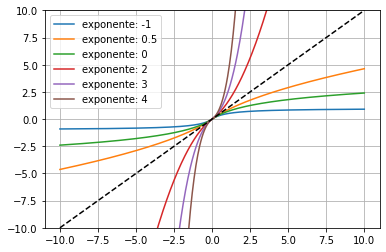

In [39]:
for lmb in LMB:
    xp=potenciaS(x,lmb)
    plt.plot(x,xp,label='exponente: {}'.format(lmb))
plt.plot(x,np.sign(x)*(abs(x)),'--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

## Yeo-Johnson
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x<0.
  \end{array}
  \right.
$$
Donde $\lambda_1+\lambda_2=2$.

Se sustituye $\lambda_2=2-\lambda_1$.
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda}-1}{\lambda} & \lambda\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda=0,\quad x\geq0\\
  -\frac{(-x+1)^{2-\lambda}-1}{2-\lambda} & \lambda\neq2,\quad x<0\\
  -\ln(-x+1) & \lambda=2,\quad x<0.
  \end{array}
  \right.
$$

In [40]:
from scipy.stats import yeojohnson

In [41]:
LMB

[-1, 0.5, 0, 2, 3, 4]

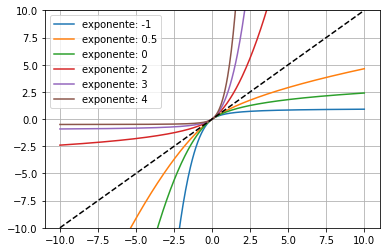

In [43]:
for lmb in LMB:
    xp=yeojohnson(x,lmb)
    plt.plot(x,xp,label='exponente: {}'.format(lmb))
plt.plot(x,np.sign(x)*(abs(x)),'--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

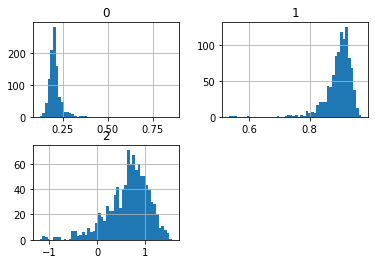

In [45]:
df.hist(bins=50)

(-12.750781894524401, -0.09169692603119495)

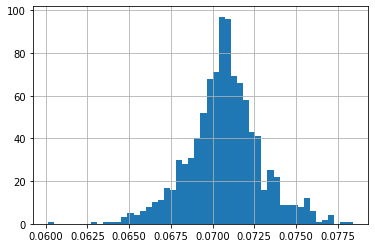

In [44]:
df_copia['0'],l=yeojohnson(df['0'])
df_copia['0'].hist(bins=50)
l,df_copia['0'].skew() # Sesgo resultante sin desplazar = 0.04

(22.18399892603115, -0.08515931210418183)

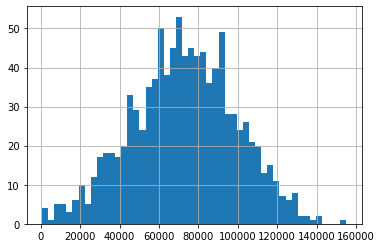

In [46]:
df_copia['1'],l=yeojohnson(df['1'])
df_copia['1'].hist(bins=50)
l,df_copia['1'].skew()

(2.0334009440523304, -0.051931710513484226)

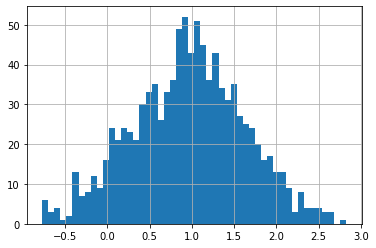

In [47]:
df_copia['2'],l=yeojohnson(df['2'])
df_copia['2'].hist(bins=50)
l,df_copia['2'].skew()

---
## Ejemplo Regresión

In [49]:
reg = pd.read_csv('regresion.csv')

In [50]:
reg.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


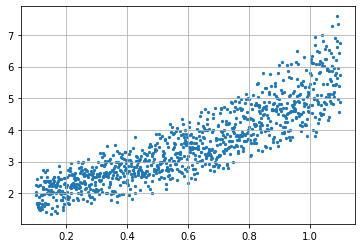

In [51]:
plt.scatter(reg['x'], reg['y'], s=5)
plt.grid()
plt.show()

In [53]:
reg_copia = reg.copy()
reg_copia['yp'], l = yeojohnson(reg['y'])


In [54]:
reg_copia

,x,y,yp
0,0.100000,1.932916,0.986370
1,0.101001,2.242087,1.069685
2,0.102002,2.022414,1.011503
3,0.103003,1.692315,0.914121
4,0.104004,1.672025,0.907687
...,...,...,...
995,1.095996,4.563710,1.495796
996,1.096997,6.415678,1.707580
997,1.097998,6.760265,1.740154
998,1.098999,5.750018,1.639354


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'yp'}>, <AxesSubplot:>]],
      dtype=object)

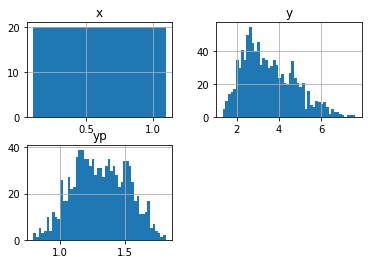

In [55]:
reg_copia.hist(bins=50)

In [56]:
l

-0.1640699985520419

In [57]:
reg['y'].skew()

0.6089606600475832

In [58]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(reg_copia[['x']], reg_copia[['yp']])
lin = LinearRegression()
lin.fit(Xtrain, Ytrain)

LinearRegression()

In [67]:
Xtrain

,x
674,0.774675
596,0.696597
994,1.094995
356,0.456356
398,0.498398
...,...
492,0.592492
707,0.807708
944,1.044945
731,0.831732


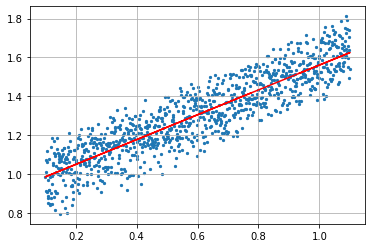

In [69]:
plt.scatter(reg_copia['x'], reg_copia['yp'], s=5)
plt.plot(Xtrain.values, lin.predict(Xtrain), 'r')
plt.grid()
plt.show()

In [63]:
x_fit = np.linspace(0,1.5,100).reshape(1,-1)

$$
x=\left\{
  \begin{array}{lr}
  \frac{(x'+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x'\geq0\\
  \ln(x'+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x'<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x'<0.
  \end{array}
  \right.
$$

In [ ]:
def inverse_yeojohnson(xp,lam):
    
    return x

In [70]:
xp = reg_copia['yp']

In [71]:
lam = l

In [ ]:
xp_inverse = inverse_yeojohnson(xp,lam)

In [ ]:
reg_copia['y'].values == xp_inverse